In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cv2.__version__

'4.8.0'

In [4]:
def show_img(img):
    # 注意：OpenCV 读取彩色图像时使用的是 BGR 色彩顺序，而 matplotlib 使用的是 RGB 顺序。
    # 所以如果你读取彩色图像，你需要使用 cv2.cvtColor 将其从 BGR 转换为 RGB。
    if img.ndim == 3:  # 如果图像是彩色的
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 使用 matplotlib 显示图像
    plt.imshow(img, cmap='gray' if img.ndim == 2 else None)
    plt.axis('off')  # 不显示坐标轴
    plt.show()

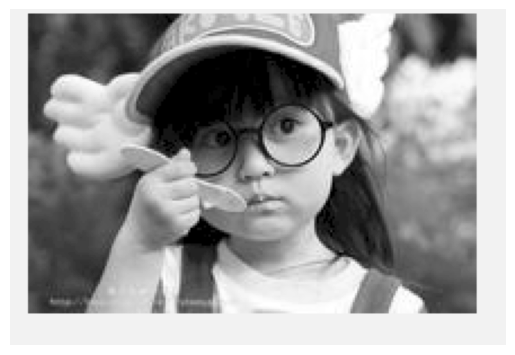

In [5]:
img = cv2.imread('./files/test.png', 0)  #试着修改 0 为 1.
show_img(img)
cv2.imshow('image', img)

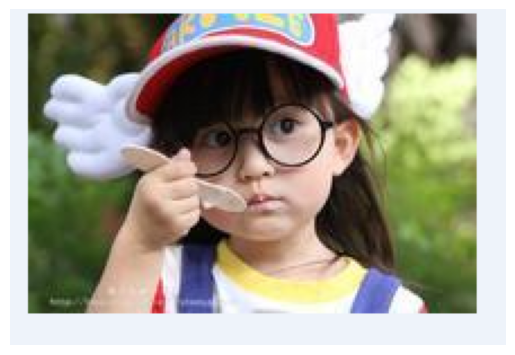

In [6]:
img = cv2.imread('./files/test.png', 1)  #试着修改 0 为 1.
show_img(img)
cv2.imshow('image', img)

In [13]:
cap = cv2.VideoCapture('./files/vtest.avi')
while (cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('frame', gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [28]:
qcap = cv2.VideoCapture(0)  # 摄像头编号

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # 注意编码器
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640, 480))

while qcap.isOpened():
    ret, frame = qcap.read()
    if ret:
        frame = cv2.flip(frame, -1)  # 旋转180度
        out.write(frame)  # write the flipped frame
        cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release everything if job is finished
qcap.release()
out.release()
cv2.destroyAllWindows()

[ WARN:0@7146.335] global cap_v4l.cpp:982 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@7146.335] global obsensor_uvc_stream_channel.cpp:156 getStreamChannelGroup Camera index out of range


In [21]:
drawing = False
# 如果mode 为true 绘制矩形。按下'm' 变成绘制曲线。
mode = True
ix, iy = -1, -1


# 创建回调函数
def draw_circle(event, x, y, flags, param):
    global ix, iy, drawing, mode
    # 当按下左键是返回起始位置坐标
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y
    # 当鼠标左键按下并移动是绘制图形。event 可以查看移动，flag 查看是否按下
    elif event == cv2.EVENT_MOUSEMOVE and flags == cv2.EVENT_FLAG_LBUTTON:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img, (ix, iy), (x, y), (0, 255, 0), -1)
            else:
                r = int(np.sqrt((x - ix) ** 2 + (y - iy) ** 2))
                cv2.circle(img, (x, y), r, (0, 0, 255), -1)
    # 当鼠标松开停止绘画。
    elif event == cv2.EVENT_LBUTTONUP:
        if mode == True:
            cv2.rectangle(img, (ix, iy), (x, y), (0, 255, 0), -1)
        else:
            cv2.circle(img, (x, y), 5, (0, 0, 255), -1)


img = np.zeros((512, 512, 3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_circle)
while (1):
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break
cv2.destroyAllWindows()

In [27]:
def mouse_callback(event, x, y, flags, param):
    global show_subtitle
    # 当左键被点击时，切换字幕显示状态
    if event == cv2.EVENT_LBUTTONDOWN:
        show_subtitle = not show_subtitle


# 初始化字幕显示状态为True（显示字幕）
show_subtitle = True

cap = cv2.VideoCapture('./files/vtest.avi')

# 设置鼠标回调函数
cv2.namedWindow('frame')
cv2.setMouseCallback('frame', mouse_callback)

while (cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        if show_subtitle:
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(gray, 'Digital Image Process 2023',
                        (50, 50), font, 1, (255, 255, 255), 2, cv2.LINE_AA)

        cv2.imshow('frame', gray)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

qt.qpa.xcb: QXcbConnection: XCB error: 148 (Unknown), sequence: 27925, resource id: 0, major code: 140 (Unknown), minor code: 20
qt.qpa.xcb: QXcbConnection: XCB error: 148 (Unknown), sequence: 27946, resource id: 0, major code: 140 (Unknown), minor code: 20
qt.qpa.xcb: QXcbConnection: XCB error: 148 (Unknown), sequence: 27962, resource id: 0, major code: 140 (Unknown), minor code: 20
